In [113]:
import numpy as np
import pandas as pd
%matplotlib inline 
from matplotlib import pyplot as plt
import seaborn as sns


In [153]:
housing = pd.read_csv('data/Ames_Housing_Price_Data.csv', index_col=0)
housing.shape

(2580, 81)

In [115]:
missing_vals = housing.columns[housing.isnull().any()] 

In [204]:
housing['Neighborhood'].value_counts()

NAmes      410
CollgCr    236
OldTown    213
Edwards    165
Somerst    143
Gilbert    143
Sawyer     139
NWAmes     123
NridgHt    121
SawyerW    113
Mitchel    104
BrkSide    103
Crawfor     93
IDOTRR      76
NoRidge     67
Timber      54
StoneBr     43
SWISU       42
ClearCr     40
MeadowV     34
BrDale      29
Blmngtn     23
Veenker     23
NPkVill     22
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

In [116]:
for column in missing_vals: #inspecting missingness
    print(column)
    print(type(column))
    print(housing[column].value_counts())
    print(housing[column].isna().sum())
    print()

LotFrontage
<class 'str'>
60.0     246
80.0     128
70.0     124
50.0     111
75.0      92
        ... 
137.0      1
135.0      1
119.0      1
195.0      1
141.0      1
Name: LotFrontage, Length: 126, dtype: int64
462

Alley
<class 'str'>
Grvl    105
Pave     63
Name: Alley, dtype: int64
2412

MasVnrType
<class 'str'>
None       1559
BrkFace     804
Stone       183
BrkCmn       20
Name: MasVnrType, dtype: int64
14

MasVnrArea
<class 'str'>
0.0      1554
120.0      13
216.0      11
108.0      10
176.0      10
         ... 
647.0       1
549.0       1
262.0       1
668.0       1
402.0       1
Name: MasVnrArea, Length: 416, dtype: int64
14

BsmtQual
<class 'str'>
TA    1166
Gd    1077
Ex     188
Fa      78
Po       2
Name: BsmtQual, dtype: int64
69

BsmtCond
<class 'str'>
TA    2316
Gd     101
Fa      88
Ex       3
Po       3
Name: BsmtCond, dtype: int64
69

BsmtExposure
<class 'str'>
No    1708
Av     344
Gd     242
Mn     215
Name: BsmtExposure, dtype: int64
71

BsmtFinType1
<class 'str

In [154]:
housing['LotFrontage'] = housing['LotFrontage'].fillna(0) 
housing['MasVnrType'] = housing['MasVnrType'].fillna('None') 
housing['MasVnrArea'] = housing['MasVnrArea'].fillna(0) 
housing['GarageCars'] = housing['GarageCars'].fillna(0)
housing['GarageArea'] = housing['GarageArea'].fillna(0)
housing['GarageYrBlt'] = housing['GarageYrBlt'].fillna('None')
housing['GarageFinish'] = housing['GarageFinish'].fillna('None')
housing['GarageType'] = housing['GarageType'].fillna('None')
housing['GarageQual'] = housing['GarageQual'].fillna('None')
housing['GarageCond'] = housing['GarageCond'].fillna('None')
housing['BsmtExposure'] = housing['BsmtExposure'].fillna('None')
housing['BsmtCond'] = housing['BsmtCond'].fillna('None')
housing['BsmtQual'] = housing['BsmtQual'].fillna('None')
housing['BsmtFinType1'] = housing['BsmtFinType1'].fillna('None')
housing['TotalBath'] = housing['FullBath'] + (housing['HalfBath']*.5)
housing['BsmtFinSF1'] = housing['BsmtFinSF1'].fillna(0)
housing['BsmtFinType2'] = housing['BsmtFinType2'].fillna('Unf')
housing['BsmtUnfSF'] = housing['BsmtUnfSF'].fillna(0) 
housing['TotalBsmtSF'] = housing['TotalBsmtSF'].fillna(0)
housing['FireplaceQu'] = housing['FireplaceQu'].fillna('None')

y = housing['SalePrice']
housing = housing.drop(labels= ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'BsmtHalfBath', 'BsmtFullBath','FullBath', 'HalfBath', 'Condition2', 'SalePrice', 'BsmtFinSF2','Electrical', 'PID',], axis=1)


In [158]:
X = pd.get_dummies(housing, drop_first=True, dummy_na=True)

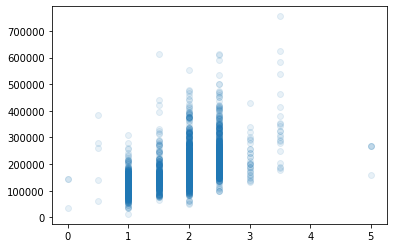

In [66]:
plt.scatter( housing['TotalBath'],housing['SalePrice'], alpha=.1)

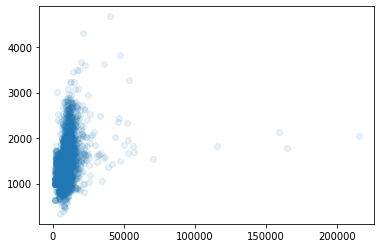

In [7]:
plt.scatter( housing['LotArea'],housing['GrLivArea'], alpha=.1)

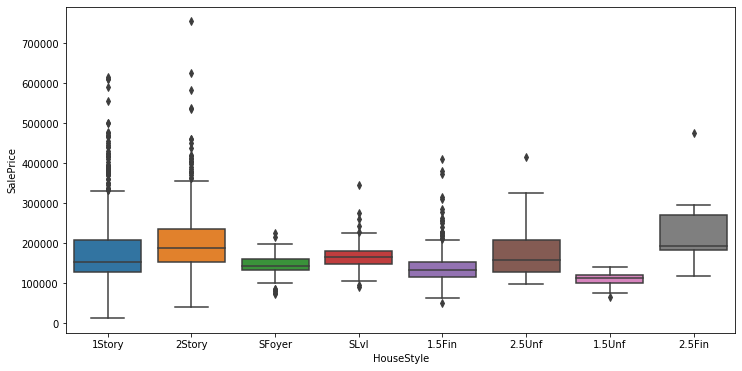

In [17]:
plt.figure(figsize=(12,6))
sns.boxplot(x='HouseStyle', y='SalePrice', data=housing)


In [51]:
features = housing[['Neighborhood', 'OverallQual','GrLivArea' ]]
price = housing['SalePrice']
dummy = pd.get_dummies(features.Neighborhood)
dummy.drop('Blmngtn', axis=1, inplace=True) # race 1 is the dominant category
features = features.drop('Neighborhood', axis=1)
features = pd.concat([features, dummy], axis=1)
features.head()

,OverallQual,GrLivArea,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,...,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
1,6,856,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,5,1049,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,5,1001,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,1039,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,8,1665,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(array([   2.,    0.,    7.,  199., 1654.,  649.,   45.,   15.,    5.,
           4.]),
 array([-249906.44800561, -197339.26981894, -144772.09163226,
         -92204.91344559,  -39637.73525892,   12929.44292776,
          65496.62111443,  118063.7993011 ,  170630.97748778,
         223198.15567445,  275765.33386113]),
 <a list of 10 Patch objects>)

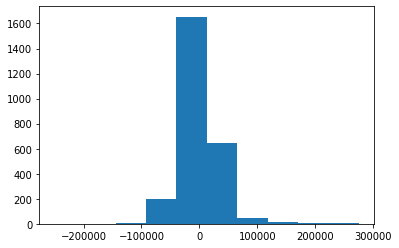

In [52]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(features, price)
residuals = price - lm.predict(features)
plt.hist(residuals)

In [53]:
print('R^2 is equal to %.3f' %(lm.score(features, price)))
print('RSS is equal to %.3f' %(np.sum((price-lm.predict(features))**2)))
print('The intercept is %.3f' %(lm.intercept_))
print('The slopes are %s' %(lm.coef_))

R^2 is equal to 0.805
RSS is equal to 2826928147011.616
The intercept is -37119.745
The slopes are [ 2.10856640e+04  5.85380583e+01 -2.63422238e+04 -4.25588306e+04
 -1.78155865e+04  2.05541870e+04  9.04483537e+03  9.83797085e+03
 -1.28044080e+04 -5.80662007e+03 -5.77748520e+03  8.76546222e+04
 -2.94442488e+04 -2.96644762e+04 -2.15560765e+04  6.90929364e+03
 -5.56149110e+03 -2.76940029e+04 -5.68607539e+03  5.28475111e+04
  6.51454770e+04 -3.02063727e+04 -3.73470312e+04 -1.66606708e+03
 -5.43404229e+03  1.60842264e+04  6.05375887e+04  3.21686549e+04
  3.23329439e+04]


### Neighborhood Analysis

Many home buyers purchase their homes based on their neighborhood preferences and the location. Study the statistics on all the **Ames** neighborhoods, including prices, price/area, lot area, gross living area, built year, the ratios of one-story homes, the lot utility rate (how much of the lot is utilized to build the house), various quality/condition metrics, house styles, etc. Please depict a story of the urban development of **Ames** and relate it to the **Ames** house prices.

To get familiar with the various **Ames** neighborhoods and the ratings of the public schools, visit the map tab of [realtor.com](https://www.realtor.com/realestateandhomes-search/North-Ames_Ames_IA?view=map). While there are many housing info web sites, **realtor.com** uses a neighborhood system which is more compatible with the one used in the dataset. Getting the long-lat coordinates of the $2500$ houses also helps to pin-point the relative geographic locations of the neighborhoods.

Consider the following questions:
- Does the price sensitivity on quality depend on the neighborhood?  
- Given that **Ames** has about $30\%$ poverty rate, and that **ISU** is the largest employer of the city, identify the affluent and poor neighborhoods based on your data analysis and the external information. Identify the neighborhoods which offer a convenient job commute.
- What types of dwelling are popular in **Ames**? How about their popularities in the different neighborhoods?
- **Time Series Analysis**:  
    - During $2006-2010$, does **Ames** housing market show any pricing trend? Is your observation consistent with the fact that the great recession occured in $2008-2009$.
    - How would you describe the price tend of different types of dwellings in terms of time series (hint: pivot/pivot_table)?
    - In the U.S., there are more house-shopping activities during the warmer seasons (spring/summer). What is the seasonality of **Ames** house transactions?

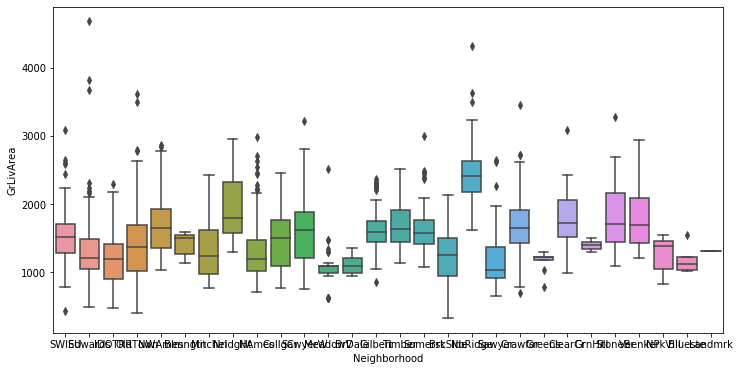

In [55]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Neighborhood', y='GrLivArea', data=housing)

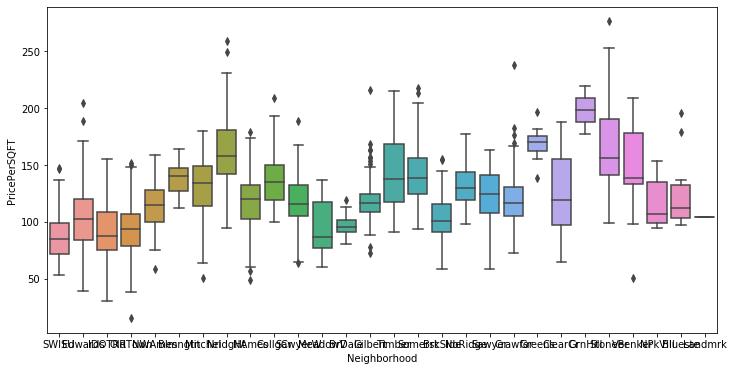

In [56]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Neighborhood', y='PricePerSQFT', data=housing)

In [167]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [168]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
lm.score(X_train, y_train)

0.9366831923777593

In [169]:
print('R^2 is equal to %.3f' %(lm.score(X_train, y_train)))
print('RSS is equal to %.3f' %(np.sum((y_train-lm.predict(X_train))**2)))
print('The intercept is %.3f' %(lm.intercept_))
print('The slopes are %s' %(lm.coef_))

R^2 is equal to 0.937
RSS is equal to 717338612194.122
The intercept is 92819.542
The slopes are [ 4.03198082e+01 -4.32515677e+01  3.50186700e-01  5.46154901e-01
  6.77134772e+03  5.70467236e+03  2.86480606e+02  6.46849213e+01
  2.47972020e+01 -1.20198068e-01 -2.07725419e+01  3.30738895e+01
  1.21478759e+01  1.80957910e+01  1.00761407e+01 -2.66661924e+03
 -1.25757818e+04  2.18066274e+02  1.14828892e+04  4.57692597e+03
  1.49415128e+01  6.74221537e+00 -1.12714978e+01  1.89074903e+01
  1.04286809e+01  5.11768060e+01  7.61705707e+00  9.40719230e-01
 -3.54825522e+02 -4.15853066e+02  6.77489855e+02 -1.73544593e+04
 -1.47752712e+04  4.73362896e+04 -2.18087119e+03 -3.23632857e+03
 -9.78935938e+03 -1.39279800e-05  1.34304684e+04  2.05343696e-05
  1.15507413e+03  3.29335472e+03  1.22123444e+03 -1.44462110e-05
  1.19050193e+04  9.54636956e+02  9.64199519e+03 -2.22926665e-05
 -4.32238575e+04  1.52225257e-05  4.57319125e+03 -3.57915225e+03
 -8.66567594e+03  1.58998052e+02 -1.22758674e-05  6.214363

In [170]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
ridge = Ridge()
lasso = Lasso()
net   = ElasticNet()

In [171]:
ridge.set_params(alpha=1.0)
ridge.fit(X_train, y_train)
ridge.score(X_train, y_train)

0.9355440456412424

In [172]:
lasso.set_params(alpha=1, normalize=True)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [173]:
lasso.fit(X_train, y_train)
print('The intercept is %.4f' %(lasso.intercept_))
lassoCoef = pd.Series(lasso.coef_, index=X_train.columns)
print('The slopes are \n%s' %(lassoCoef))

The intercept is -58975.5854
The slopes are 
GrLivArea                   53.350161
MSSubClass                 -56.623770
LotFrontage                  0.000000
LotArea                      0.517678
OverallQual               7159.502481
                             ...     
SaleCondition_Alloca     23330.144959
SaleCondition_Family    -16883.108449
SaleCondition_Normal      6306.374670
SaleCondition_Partial    17057.782112
SaleCondition_nan            0.000000
Length: 375, dtype: float64


In [182]:
coefs = []
intercepts = []
R2  = []
alphaRange = np.linspace(1e-3,2000,50)
for alpha in alphaRange:
    lasso.set_params(alpha=alpha, normalize = True)  
    lasso.fit(X_train, y_train)
    intercepts.append(lasso.intercept_)
    coefs.append(lasso.coef_)
    R2.append(lasso.score(X_train, y_train))  

/home/jack/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 335508496690.3213, tolerance: 1132935533.44302
  positive)


Text(0.5, 1.0, 'Change of Lasso Slopes Varying Alpha')

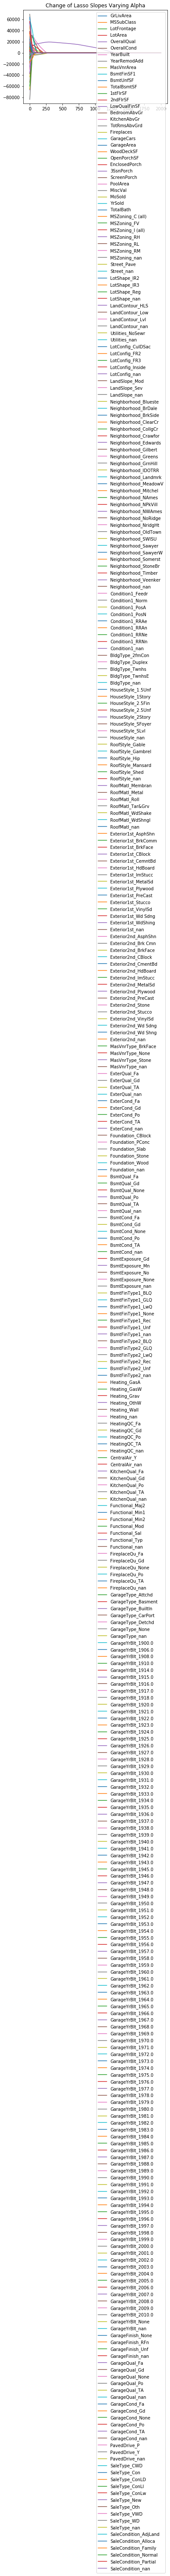

In [183]:
coefs = pd.DataFrame(np.array(coefs), columns=X.columns)

for name in coefs.columns:
    plt.plot(alphaRange, coefs[name], label=name)
plt.legend(loc=1)    
plt.title('Change of Lasso Slopes Varying Alpha')

In [ ]:
alphaSize  = 40
rhoSize    = 30
alphaRange = np.linspace(1e-2, 10, alphaSize)
rhoRange   = np.linspace(0.01, 1, rhoSize)
trainR2    = np.zeros((alphaSize, rhoSize))
testR2     = np.zeros((alphaSize, rhoSize))
intercepts = np.zeros((alphaSize, rhoSize))
coefs      = np.zeros((alphaSize, rhoSize, 8))

net.set_params(normalize=True)

for alphaIdx, alpha in enumerate(alphaRange):
    for rhoIdx, rho in enumerate(rhoRange):
        net.set_params(alpha=alpha, l1_ratio=rho)
        net.fit(X_train, y_train)
        trainR2[alphaIdx, rhoIdx] = net.score(trainX, trainY)
        testR2[alphaIdx, rhoIdx]  = net.score(testX, testY)
        intercepts[alphaIdx, rhoIdx] = net.intercept_
        coefs[alphaIdx, rhoIdx, :] = net.coef_

In [193]:
# (1)
from sklearn import ensemble
import sklearn.model_selection as ms
randomForest = ensemble.RandomForestRegressor()

randomForest.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)>

In [190]:

# fit RF model on training set
randomForest.set_params(random_state=0)

randomForest.fit(X_train, y_train) 

print("The training error is: %.5f" % (1 - randomForest.score(X_train, y_train)))
print("The test     error is: %.5f" % (1 - randomForest.score(X_test, y_test)))

The training error is: 0.01548
The test     error is: 0.10771


In [191]:
# set the parameter grid
grid_para_forest = {
    'max_depth': range(1, 31),
    'n_estimators': range(10, 110, 10)
}

In [199]:
grid_search_forest = ms.GridSearchCV(randomForest, grid_para_forest, scoring='r2', cv=5, n_jobs=-1)
%time grid_search_forest.fit(X_train, y_train)

CPU times: user 13.7 s, sys: 1.1 s, total: 14.8 s
Wall time: 11min 59s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [209]:
# get the best parameters
grid_search_forest.best_params_

{'max_depth': 25, 'n_estimators': 50}

In [210]:
# get the best score
grid_search_forest.best_score_

0.8827667669323371

In [205]:
print('The best score is %.4f' %grid_search_forest.best_score_)
print('The training error is %.4f' %(1 - grid_search_forest.best_estimator_.score(X_train, y_train)))
print('The testing error is %.4f' %(1 - grid_search_forest.best_estimator_.score(X_test, y_test)))

The best score is 0.8828
The training error is 0.0167
The testing error is 0.1071


In [212]:
randomForest.set_params(max_depth = 25, n_estimators = 50)
randomForest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=25, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [213]:
# feature importance sort
# (3)
feature_importance = list(zip(X.columns, randomForest.feature_importances_))
dtype = [('feature', 'S10'), ('importance', 'float')]
feature_importance = np.array(feature_importance, dtype=dtype)
feature_sort = np.sort(feature_importance, order='importance')[::-1]
[i for (i, j) in feature_sort[0:5]]

[b'OverallQua', b'GrLivArea', b'1stFlrSF', b'GarageArea', b'TotalBsmtS']

Text(0.5, 1.0, 'feature importance')

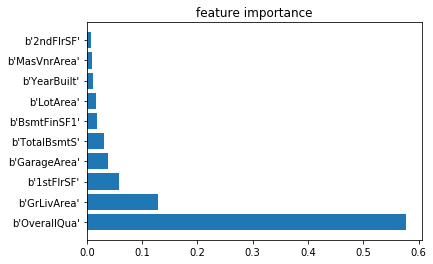

In [215]:
featureNames, featureScores = zip(*list(feature_sort[0:10]))
plt.barh(range(len(featureScores)), featureScores, tick_label=featureNames)
plt.title('feature importance')

In [228]:

lm = LinearRegression()
lm.fit(X_train[['OverallQual', 'GrLivArea', '1stFlrSF', 'GarageArea', 'TotalBsmtSF','LotArea', 'YearBuilt']], y_train)
lm.score(X_train[['OverallQual', 'GrLivArea', '1stFlrSF', 'GarageArea', 'TotalBsmtSF','LotArea', 'YearBuilt']], y_train)

0.8221252158402039